### Исследование объявлений о продаже квартир

Цель: установить параметры которые влияют на продажу. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# загрузим необходимые библиотеки
import pandas as pd 
# отключим дефолтное ограничение на кол-во отображаемых столбцов в pandas
pd.set_option('display.max_columns', None)


In [2]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'C:/Users/PC/проекты Яндекс/Датасеты/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП
username = 'PC'
try:
    username = os.environ["USERNAME"]
except:
    pass
if(username == 'PC'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp    
data = pd.read_csv(root_path + 'real_estate_data.csv', sep="\t")

In [3]:
#изучим общую информацию о таблице 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# изучим-с первые и последние 10 значений
data.head(10)
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#изучим наборы столбцов более детально
print(data['total_images'].value_counts())
print(data['last_price'].value_counts())
print(data['total_area'].value_counts())
print(data['first_day_exposition'].value_counts())
print(data['rooms'].value_counts())
print(data['ceiling_height'].value_counts())
print(data['floors_total'].value_counts())
print(data['living_area'].value_counts())
print(data['floor'].value_counts())
print(data['is_apartment'].value_counts())
print(data['studio'].value_counts())
print(data['open_plan'].value_counts())
print(data['kitchen_area'].value_counts())
print(data['balcony'].value_counts())
print(data['locality_name'].value_counts())
print(data['airports_nearest'].value_counts())
print(data['cityCenters_nearest'].value_counts())
print(data['parks_around3000'].value_counts())
print(data['parks_nearest'].value_counts())
print(data['ponds_around3000'].value_counts())
print(data['ponds_nearest'].value_counts())
print(data['days_exposition'].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

In [6]:
#исследуем числовое 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

1. 76% есть airports_nearest. Не везде есть данные Возможно в коде рассчёта стоит отсечка на 85 км. 
2. Балконы, видимо, есть только у половины. А у кого-то их даже 5(!). balcony — число балконов
3. 60% знают высоту потолков. А кто-то живёт почти под открытом небом - 100 метров. ceiling_height 
4. Расстояниие до центра есть не всех. Возможно стоит кодовая отсечка после 66 км. cityCenters_nearest 
5. 86% квартир вставали в публикацию, например, из-за долгого онбрдинга. days_exposition 
6. У всех есть дата публикации. first_day_exposition — дата публикации
7. Все живут на каком-то floor.
8. Информация о этажах могло просто не быть, но почти 100% знают сколько этажей в доме, 
либо этой информации не было у заполняющего анкету. floors_total — всего этажей в доме
9. Видимо этот пункт был не обязателен для заполнения. is_apartment — апартаменты (булев тип)
10. 90% знают свою. kitchen_area — площадь кухни в квадратных метрах (м²)
11. Целевой пункт заполнен всеми! last_price — цена на момент снятия с публикации
12. 92% заполнили жилую площадь. living_area
13. Название населённого пункта определно почти на 100%. locality_name
14. Менее 1% могут что-то планировать в квартитре. Похоже, что студий почти нет. open_plan
15. Половина квартир без парков вблизи 3 км. Это нормально! parks_around3000 — число парков в радиусе 3 км
16. Всего у 34% удалось определить расстояние до ближайшего парка. parks_nearest — расстояние до ближайшего парка (м)
17. Похоже что, почти в каждом парке есть водоём. Данные схожи. ponds_around3000 — число водоёмов в радиусе 3 км
18. 38% - всё таки, программа плохо определяет расстояние. Водоём в 3км, а расстояние не измерено. ponds_nearest 
19. Комнаты заполнены у всех! rooms — число комнат
20. Параметр studio идеально коррелирует с open_plan. Гипотеза подвердилась! (булев тип)
21. В целом всё ОК! Но кто-то здаёт даже замки на 900 м2! total_area — площадь квартиры в квадратных метрах (м²)
22. Фоток хватает у всех. total_images — число фотографий квартиры в объявлении

### Шаг 2. Предобработка данных

In [7]:
# Проверим дубликаты
data.duplicated().sum()

0

In [8]:
#проверим количество не заполненых значений
print('total_images -', data['total_images'].isnull().sum())
print('last_price -', data['last_price'].isnull().sum())
print('total_area -', data['total_area'].isnull().sum())
print('first_day_exposition -', data['first_day_exposition'].isnull().sum())
print('rooms -', data['rooms'].isnull().sum())
print('ceiling_height -', data['ceiling_height'].isnull().sum())
print('floors_total -', data['floors_total'].isnull().sum())
print('living_area -', data['living_area'].isnull().sum())
print('floor -', data['floor'].isnull().sum())
print('is_apartment -', data['is_apartment'].isnull().sum())
print('studio -', data['studio'].isnull().sum())
print('open_plan -', data['open_plan'].isnull().sum())
print('kitchen_area -', data['kitchen_area'].isnull().sum())
print('balcony -', data['balcony'].isnull().sum())
print('locality_name -', data['locality_name'].isnull().sum())
print('airports_nearest -', data['airports_nearest'].isnull().sum())
print('cityCenters_neares -', data['cityCenters_nearest'].isnull().sum())
print('parks_around3000 -', data['parks_around3000'].isnull().sum())
print('parks_nearest -', data['parks_nearest'].isnull().sum())
print('ponds_around3000 -', data['ponds_around3000'].isnull().sum())
print('ponds_nearest -', data['ponds_nearest'].isnull().sum())
print('days_exposition -', data['days_exposition'].isnull().sum())
print('price_permetr -', data['days_exposition'].isnull().sum())

total_images - 0
last_price - 0
total_area - 0
first_day_exposition - 0
rooms - 0
ceiling_height - 9195
floors_total - 86
living_area - 1903
floor - 0
is_apartment - 20924
studio - 0
open_plan - 0
kitchen_area - 2278
balcony - 11519
locality_name - 49
airports_nearest - 5542
cityCenters_neares - 5519
parks_around3000 - 5518
parks_nearest - 15620
ponds_around3000 - 5518
ponds_nearest - 14589
days_exposition - 3181
price_permetr - 3181


In [9]:
# заполним средним значением пустые значения потолков
#ceiling_height_mean = data['ceiling_height'].mean()
#data['days_exposition'] = data['ceiling_height'].fillna(ceiling_height_mean)
#print('ceiling_height -', data['ceiling_height'].isnull().sum())

In [10]:
# приведем в порядок типы данных. 
# last_price - бесполезные нули после запятой нам не нужны.
# is_apartment  - данные должны быть булевыми
# balcony - целые балконы более реалистичные
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  Int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [11]:
# посмотрим природу балконов, например по числу комнат
data['balcony'].value_counts()

1    4195
0    3758
2    3659
5     304
4     183
3      81
Name: balcony, dtype: Int64

In [12]:
# посмотрим природу балконов, например по числу комнат
data[data['balcony'].isnull()]['rooms'].value_counts()

1     3819
2     3810
3     2860
4      652
5      187
0       71
6       68
7       32
8        8
9        6
11       2
15       1
14       1
12       1
19       1
Name: rooms, dtype: int64

In [13]:
# трудно сказать зачемне заполнили количество балконов. 
# Тем более, бОльшая часть квартир далеко от центра, там где балконов действительно почти нет.
# Возможно это странный вопрос - "Кол-во балконов?"
# заменим пустые значения балконов на 0. 
data['balcony'] = data['balcony'].fillna(0)

In [14]:
# приведем дату публикации к виду типа: 2018-04-06 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
# посмотрим природу locality_name, например по числу балконов
data[data['locality_name'].isnull()]['balcony'].value_counts()

0    39
1     8
2     1
4     1
Name: balcony, dtype: Int64

In [16]:
# почистим столбик locality_name
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace(' ', '_')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('городской_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('поселок_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('деревня_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('городского_типа_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('при_железнодорожной_станции_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('село_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('станции_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('коттеджный_', '')
data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('садовое_товарищество', '')

data['locality_name'] = data['locality_name'].reset_index(drop = True).str.replace('садоводческое_некоммерческое_товарищество_', '')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный_Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое_Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', '_Новая_Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное_Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый_Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый_Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск'

In [17]:
data['locality_name'].value_counts().head(36)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Сестрорецк           183
Красное_Село         178
Новое_Девяткино      144
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                114
Сланцы               112
Волхов               111
Тосно                104
Кингисепп            104
Кронштадт             96
Никольское            94
Коммунар              89
Сосновый_Бор          87
Кировск               84
Отрадное              80
Янино-1               68
Приозерск             66
Металлострой          66
Старая                64
Шлиссельбург          57
Луга                  56
Тихвин                49
Стрельна              44
Name: locality_name, dtype: int64

In [18]:
#заполним пустые значения дней размещения маркером 7777, т.к. это свидельствует о том что объявление ещё не размещено 
data['days_exposition'] = data['days_exposition'].fillna(7777)
print('days_exposition -', data['days_exposition'].isnull().sum())

days_exposition - 0


In [19]:
# получим табличку, где у нас хранятся медианные значения высоты потолков в зависимости от высоты здания
ceiling_height_median = data.groupby(['floors_total']).agg({'ceiling_height' : 'median'})
# напишем цикл который будет подставлять в место пропущенных значений (NaN) высоты потолков
for row in ceiling_height_median.index: 
    data.loc[data['floors_total'] == row,'ceiling_height'] = data.loc[data['floors_total'] == row,'ceiling_height'].fillna(ceiling_height_median.loc[row, 'ceiling_height'])
print('ceiling_height -', data['ceiling_height'].isnull().sum())

ceiling_height - 78


In [20]:
# получим табличку, где у нас хранятся медианные значения высоты зданий в зависимости от локации
floors_total_median = data.groupby(['locality_name']).agg({'floors_total' : 'median'})
# напишем цикл который будет подставлять в место пропущенных значений (NaN) высоты зданий
for row in floors_total_median.index:
    data.loc[data['locality_name'] == row,'floors_total'] = data.loc[data['locality_name'] == row,'floors_total'].fillna(floors_total_median.loc[row, 'floors_total'])
print('floors_total -', data['floors_total'].isnull().sum()) 

floors_total - 1


In [21]:
# получим табличку, с средней пропорцей сколько занимает кухня от площади
data['kitchen_k'] = data['kitchen_area'] / data['total_area']
# получит табличку, где у нас хранятся среднее значения площади кухни для каждой квартиры
kitchen_mean_k = data.groupby('rooms').agg({'kitchen_k' : 'mean'})
# напишем цикл который будет подставлять в место пропущенных значений (NaN) площади кухни среднее значение по кухне

for room in kitchen_mean_k.index:
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isnull()), 'kitchen_area'] = data.loc[(data['rooms'] == room) & (data['kitchen_area'].isnull()), 'total_area'] * kitchen_mean_k.loc[room, 'kitchen_k']

print('kitchen_area -', data['kitchen_area'].isnull().sum())

kitchen_area - 197


In [22]:
# получим табличку, с средней пропорцей сколько занимает жил площадь от общей площади
data['living_k'] = data['living_area'] / data['total_area']
# получит табличку, где у нас хранятся среднее значения площади кухни для каждой квартиры
living_mean_k = data.groupby('rooms').agg({'living_k' : 'mean'})
# напишем цикл который будет подставлять в место пропущенных значений (NaN) жил площади среднее значение по ней

for room in living_mean_k.index:
    data.loc[(data['rooms'] == room) & (data['living_area'].isnull()), 'living_area'] = data.loc[(data['rooms'] == room) & (data['living_area'].isnull()), 'total_area'] * living_mean_k.loc[room, 'living_k']

print('living_area -', data['living_area'].isnull().sum())

living_area - 0


In [23]:
# заполнем остальные Naт кухни пропорционально площади 
kitchen_item = data.groupby('living_area').agg({'kitchen_area' : 'mean'})
 
for row in kitchen_item.index:
    data.loc[data['living_area'] == row, 'kitchen_area'] = data.loc[data['living_area'] == row,'kitchen_area'].fillna(kitchen_item.loc[row, 'kitchen_area'])
print('kitchen_area -', data['kitchen_area'].isnull().sum())

kitchen_area - 22


### Шаг 3. Посчитайте и добавьте в таблицу

Шаг 3. Посчитайте и добавьте в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
# посчитаем цену квадратного метра в переменной price_permetr
data['price_permetr'] = data['last_price'] / data['total_area']
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_k,living_k,price_permetr
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,7777.0,0.231481,0.472222,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.600000,1,True,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.300000,4,True,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,99.422951,9,True,False,False,22.407531,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000,100000.000000


In [25]:
# разобьем этажи (floor) на категории 
def floor_category(row):
    if row['floor'] == 1:     
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
#проверим цикл    
#print(floor_category(1))

# пришьём цикл к данным 
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'].value_counts()

другой       17441
последний     3341
первый        2917
Name: floor_category, dtype: int64

In [26]:
#добавим столбик с днями недели, месяцами и годами
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

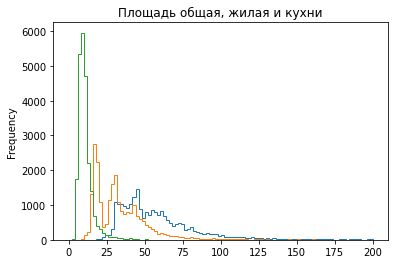

In [27]:
# построим гистограмму для площади, цены, числа комнат, высоты потолков 
#data['total_area'].hist(title = 'total_area', bins = 100, range = (0, 200))
#data['living_area'].hist(bins = 100, range = (0, 200))
# data['kitchen_area'].hist(bins = 100, range = (0, 200))
data['total_area'].plot(kind = 'hist', histtype='step', bins = 100, range = (0, 200))
data['living_area'].plot(kind = 'hist', histtype='step', bins = 100, range = (0, 200))
data['kitchen_area'].plot(kind = 'hist', histtype='step', title = 'Площадь общая, жилая и кухни', bins = 100, range = (0, 200))

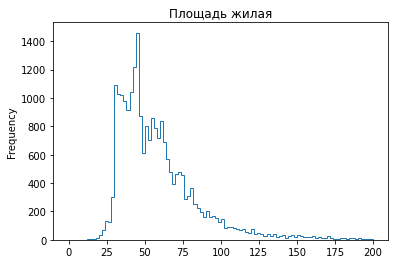

In [28]:
data['total_area'].plot(kind = 'hist', histtype='step', title = 'Площадь жилая', bins = 100, range = (0, 200))

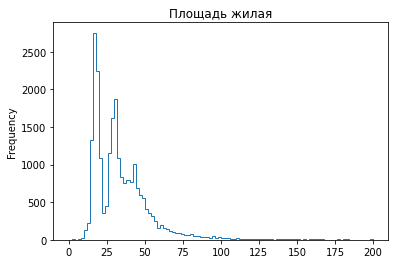

In [29]:
data['living_area'].plot(kind = 'hist', histtype='step', title = 'Площадь жилая', bins = 100, range = (0, 200))

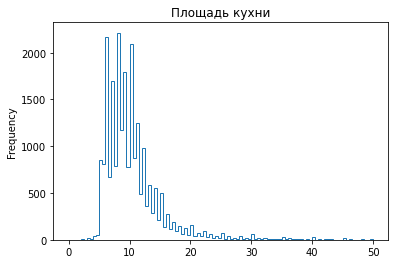

In [30]:
data['kitchen_area'].plot(kind = 'hist', histtype='step', title = 'Площадь кухни', bins = 100, range = (0, 50))

In [31]:
# построим корреляцию для столбцов с площадями 
data_area = data.pivot_table(index = 'balcony', values = ['total_area', 'living_area', 'kitchen_area'])
data_area.corr()
# заполним пустые значения кухни и жилой площади пропорционально площади квартиры 

,kitchen_area,living_area,total_area
kitchen_area,1.000000,0.920994,0.946223
living_area,0.920994,1.000000,0.995402
total_area,0.946223,0.995402,1.000000


In [32]:
# заполним пустые значения кухни и жилой площади пропорционально площади квартиры 

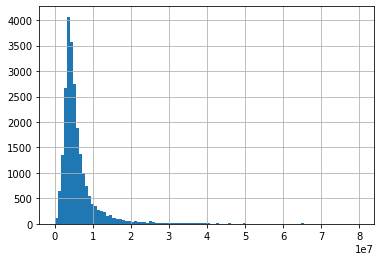

In [33]:
# построим гистограмму для цены
data['last_price'].hist(bins = 100, range = (0, 80000000))

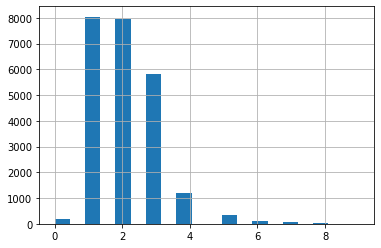

In [34]:
# построим гистограмму для числа комнат
data['rooms'].hist(bins = 20, range = (0, 9))

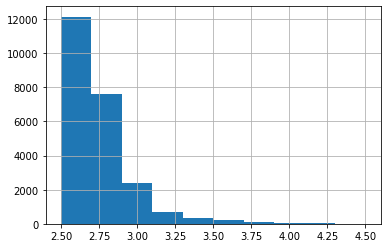

In [35]:
# построим гистограмму для высоты потолков
data['ceiling_height'].hist(bins = 10, range = (2.5, 4.5))

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

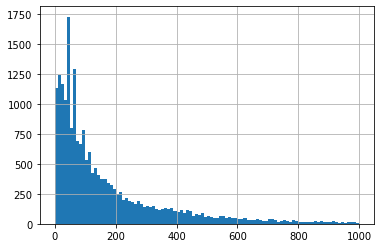

In [36]:
# построим гистограмму времени продажи
data['days_exposition'].hist(bins = 100, range = (0, 1000))

1200.477235326385
124.0


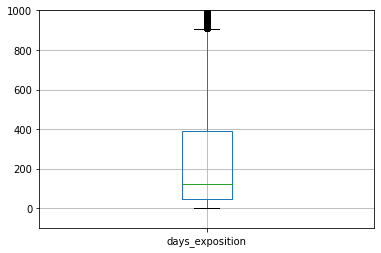

In [37]:
# посмотрим сроки продаж и отсечём не нужное
import matplotlib.pyplot as plt
data.boxplot(column = 'days_exposition')
plt.ylim(-100, 1000)
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

In [38]:
# большая часть значений лежит  до 400 дней
# медианное же значение около 100
# посчитаем среднюю долю быстрых и долгих покупок ограничев быстрые до 30 и более 800 днями
data['good_fast'] = data['days_exposition'] < 800
# data['too_slow'] = data['days_exposition'] > 800
print(data['good_fast'].mean())
#print(data['too_slow'].mean())

0.8407105785054222


In [39]:
# выведем доли по городам 
fast_sale = data.pivot_table(index = 'locality_name', values = 'good_fast', aggfunc = 'mean')
# отсечем аномальные сроки продаж, число комнат
good_locality = data.query(
    'locality_name in @fast_sale.index and 7 <= days_exposition <= 500 and rooms <= 5 and total_area < 150 and ceiling_height < 3.75' 
)
print(len(data))
print(len(good_locality))

23699
17607


In [40]:
# посчитаем среднее и медиану
print(good_locality['days_exposition'].median())
print(good_locality['days_exposition'].mean())

88.00000000000001
129.97057988300108


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BE0E1AE88>,
      dtype=object)

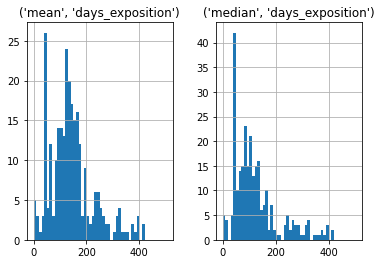

In [41]:
# гораздо лучше! посмотрим на средее и медиану
good_locality_table = good_locality.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = ['median', 'mean'])
good_locality_table.hist(bins = 50, range = (0, 500))

In [42]:
#больше всего продают, как ожидалось, в больших городах!
good_locality_stat = good_locality.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = ['mean', 'median', 'count'])
good_locality_stat.sort_values(by = ('count', 'days_exposition'), ascending = False).head(5)

,mean,median,count
,days_exposition,days_exposition,days_exposition
locality_name,,,
Санкт-Петербург,128.677126,88.0,11537
Мурино,113.669371,74.0,493
Кудрово,110.108808,67.0,386
Шушары,124.480106,89.0,377
Всеволожск,146.986577,108.5,298


In [43]:
# как зависит число комнат продаж
good_locality_room = good_locality.pivot_table(index = ['rooms'], values = 'days_exposition', aggfunc = ['mean', 'count'])
good_locality_room.sort_values(by = ('count', 'days_exposition'), ascending = False).head(5)

,mean,count
,days_exposition,days_exposition
rooms,,
1,121.137851,6478
2,128.787482,6103
3,142.639004,4097
4,155.190405,667
0,89.677215,158


In [44]:
# однушки ликвидней! как и было очевидно
# как зависит этажность от числа продаж
good_locality_floor = good_locality.pivot_table(index = ['floor_category'], values = 'days_exposition', aggfunc = ['mean', 'count'])
good_locality_floor.sort_values(by = ('count', 'days_exposition'), ascending = False).head(10)

,mean,count
,days_exposition,days_exposition
floor_category,,
другой,126.351335,13110
последний,135.264568,2351
первый,146.280988,2146


In [45]:
# берут преимущественно "другие" этажи
# как зависит цена за метр от числа продаж по размещению
good_locality_area = good_locality.pivot_table(index = ['days_exposition'], values = 'total_area', aggfunc = ['mean', 'count'])
good_locality_area.sort_values(by = ('count', 'total_area'), ascending = False).head(10)

,mean,count
,total_area,total_area
days_exposition,,
45.0,45.465377,876
60.0,60.415346,535
7.0,51.394329,231
30.0,52.210296,203
90.0,80.043239,176
14.0,51.621348,141
9.0,51.386571,140
44.0,49.631241,137


In [46]:
# в основном берут хаты около 45 кв. 
# как зависит площадь от числа продаж
good_locality_price = good_locality.pivot_table(index = ['price_permetr'], values = 'days_exposition', aggfunc = ['mean', 'count'])
good_locality_price.sort_values(by = ('count', 'days_exposition'), ascending = False).head(5)

,mean,count
,days_exposition,days_exposition
price_permetr,,
100000.000000,110.083333,204
83333.333333,99.673077,52
75000.000000,144.653061,49
80000.000000,109.162791,43
66666.666667,173.675000,40


,last_price,total_area
last_price,1.000000,0.745011
total_area,0.745011,1.000000


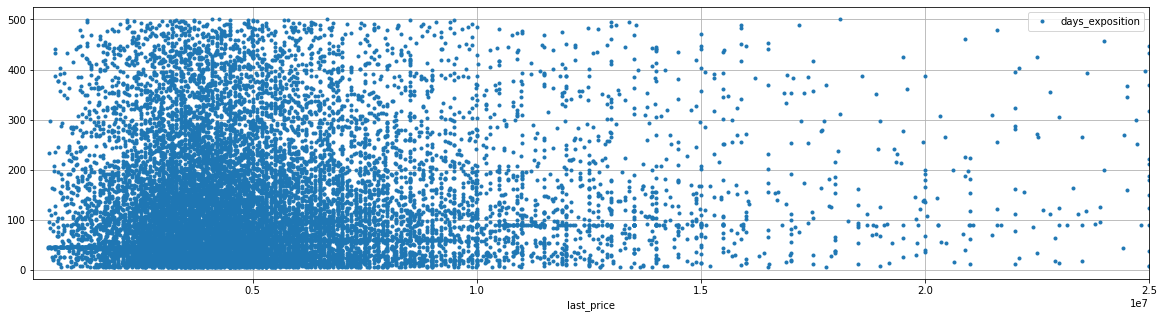

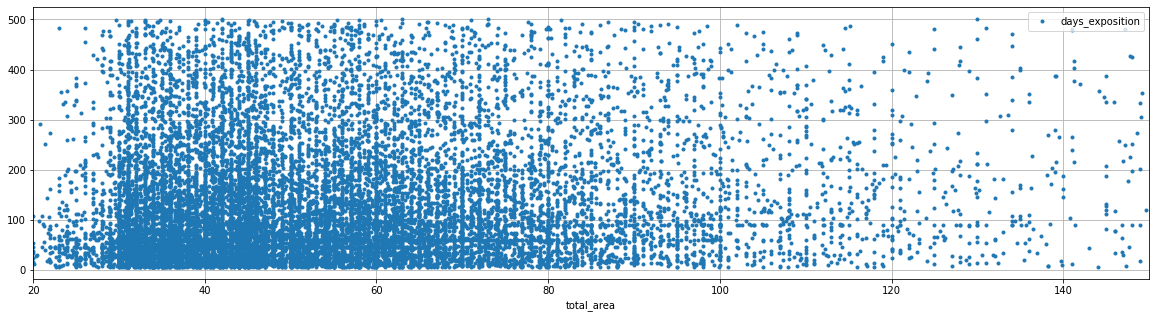

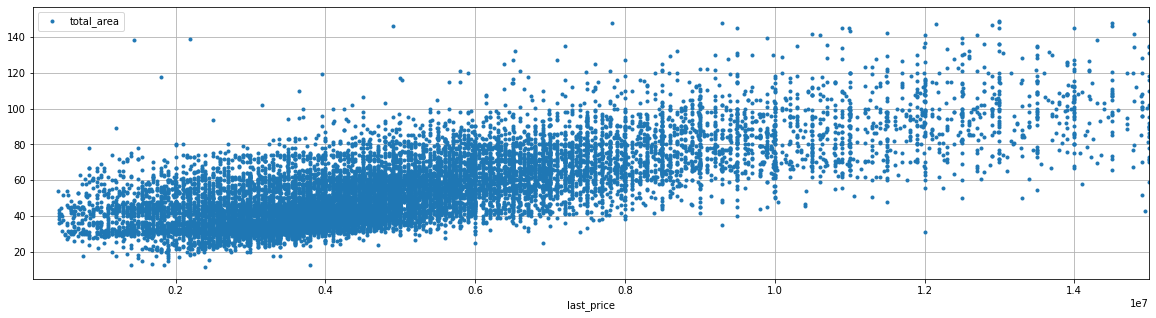

In [47]:
# чем больше площадь, тем дороже продавать. Логично!
# построим графики для изучения срока продажи от цены, площади, и цены от квадратного метра
good_locality.plot(x='last_price', y='days_exposition', style='.', xlim=(100000, 25000000), figsize=(20, 5), grid = True)
good_locality.plot(x='total_area', y='days_exposition', style='.', xlim=(20, 150), figsize=(20, 5), grid = True)
good_locality.plot(x='last_price', y='total_area', style='.', xlim=(100000, 15000000), figsize=(20, 5), grid = True)
data_price = good_locality.pivot_table(index = 'days_exposition', values = ['last_price', 'total_area'])
data_price.corr()

In [48]:
# цены в основном до 10 млн. и площади до от 20 до 150 м2
# цены растут вместе с площадью и хорошо коррелируется! 

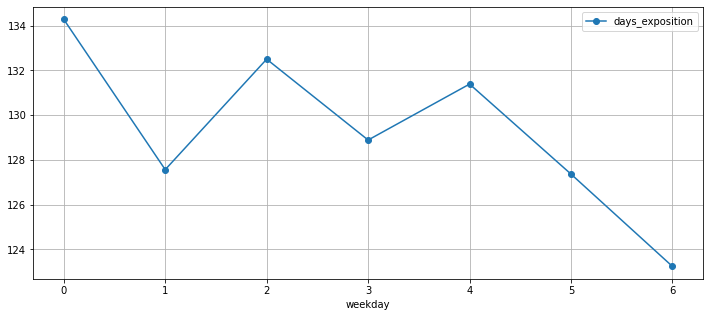

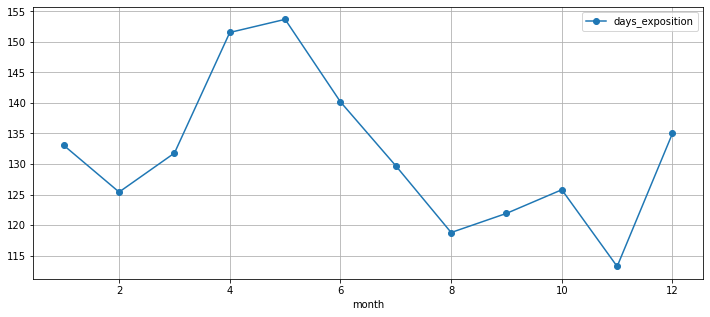

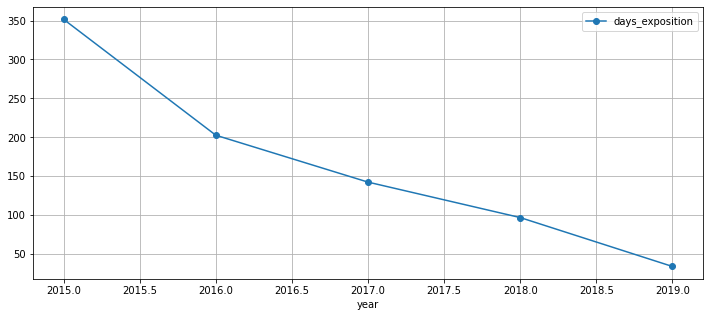

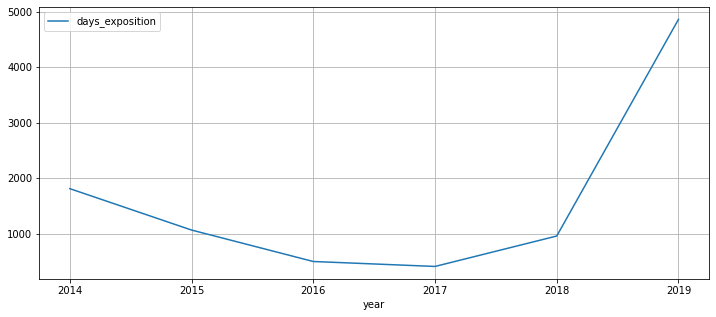

In [49]:
# рассмотрим зависимости сроков, локации от времени размещения
good_locality.pivot_table(index='weekday', values='days_exposition').plot(grid=True, style = 'o-', figsize=(12, 5))
good_locality.pivot_table(index='month', values='days_exposition').plot(grid=True, style = 'o-', figsize=(12, 5))
good_locality.pivot_table(index='year', values='days_exposition').plot(grid=True, style = 'o-', figsize=(12, 5))
data.pivot_table(index='year', values='days_exposition').plot(grid=True, figsize=(12, 5))

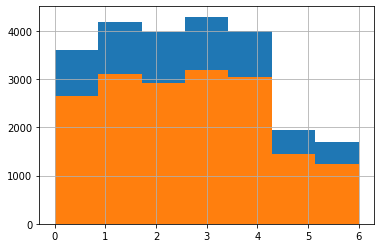

In [50]:
# объявления живут больше всего в начале недели, летом квартиры хуже продаются. 
# А вот 2019 году мы срезали пласт с некачественными данными. 
# Ведь с каждым годом срок размещения должен падать, т.к. население увеличивается из года в год.
data['weekday'].hist(bins = 7)
good_locality['weekday'].hist(bins = 7)
# публикуют в основном в будни, по выходным отдыхают 

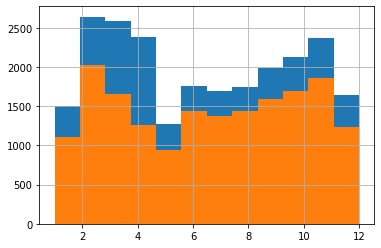

In [51]:
data['month'].hist(bins = 12)
good_locality['month'].hist(bins = 12)
# Сезон падает к лету и концу года. Наростает после лета 

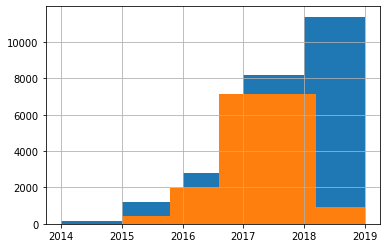

In [52]:
data['year'].hist(bins = 5)
good_locality['year'].hist(bins = 5)
# срезали 2019 год... Возможно там было слишком много спама от ботов

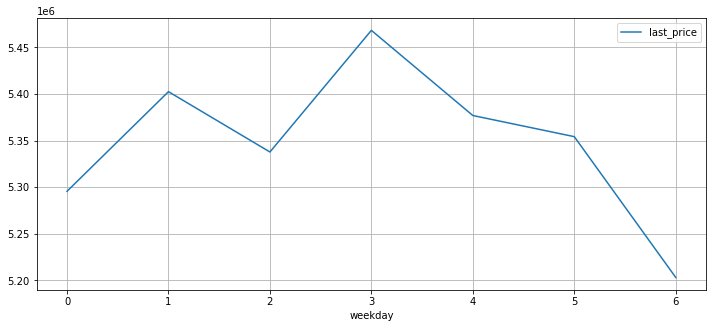

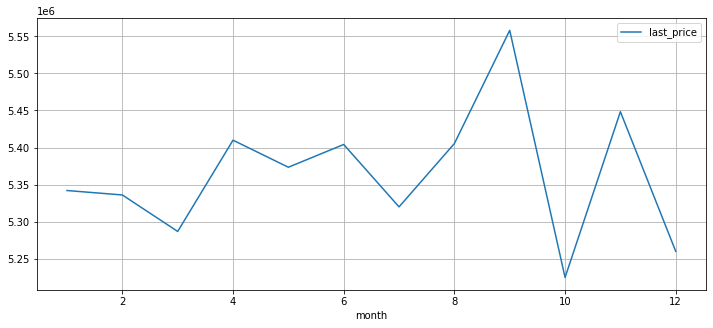

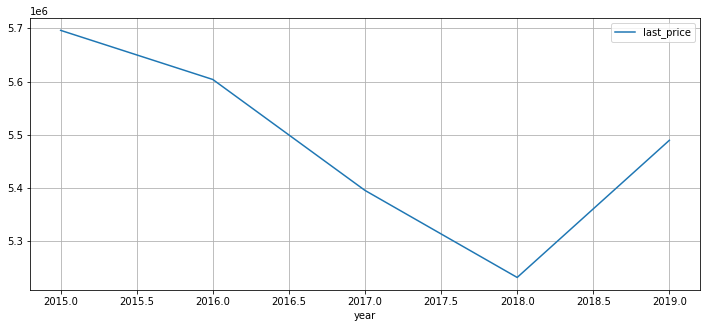

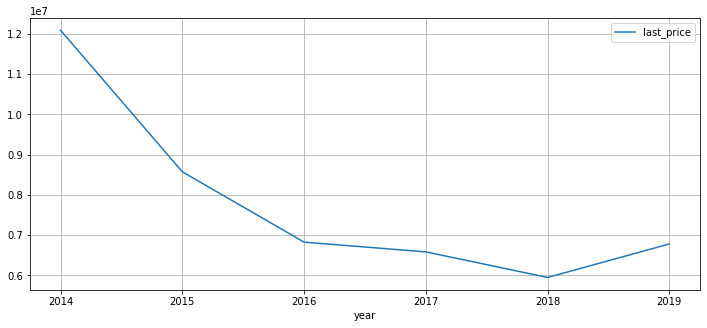

In [53]:
good_locality.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5))
good_locality.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5))
good_locality.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5))

In [54]:
# среди недели ломят самые высокие цены!
# в августе цены самые высокие
# цена за кв метр падала до 2018

In [55]:
# удалим лишние столбцы
del good_locality['kitchen_k']
del good_locality['living_k']
del good_locality['parks_nearest']
del good_locality['parks_around3000']
del good_locality['ponds_nearest']
del good_locality['ponds_around3000']

In [56]:
# Посчитаем среднюю цену квадратного метра в 10 населённых пунктов с наибольшим числом объявлений. 
# Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 
locality_permetr = good_locality.pivot_table(index = 'locality_name', values = 'price_permetr', aggfunc = ['count', 'mean'])
locality_permetr.sort_values(by = ('count', 'price_permetr'), ascending = False).head(10)

,count,mean
,price_permetr,price_permetr
locality_name,,
Санкт-Петербург,11537,109506.566135
Мурино,493,85958.164199
Кудрово,386,94449.882081
Шушары,377,77967.676688
Всеволожск,298,68665.303857
Колпино,280,74512.005103
Парголово,270,88870.988215
Пушкин,258,100494.842645


In [57]:
locality_permetr.sort_values(by = ('count', 'price_permetr'), ascending = True).head(10)

,count,mean
,price_permetr,price_permetr
locality_name,,
_Приладожский,1,44166.666667
Петро-Славянка,1,73333.333333
Каложицы,1,26715.686275
Пикколово,1,53250.345781
Иссад,1,34848.484848
Платформа_69-й_километр,1,25616.698292
Плоское,1,20912.547529
Починок,1,31395.348837


In [58]:
#  напишем цикл для разбиения Питера на локации по 1 км от центра
# ['kitchen_k', 'living_k', 'kitchen_k', 'parks_nearest', 'parks_around3000',  'ponds_nearest',  'ponds_around3000']
spb_data = good_locality.query('locality_name == "Санкт-Петербург"')
spb_data['km_cityCenters'] = spb_data['cityCenters_nearest'] / 1000
# проверим пустые значения и удалим
# spb_data['km_cityCenters'].isnull().sum()
spb_data.dropna(inplace = True)
spb_data['km_cityCenters'].isnull().sum()
# Убьем дробные значения в столбце
spb_data['km_cityCenters'] = spb_data['km_cityCenters'].astype('int')

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [59]:
# посчитаем сруднюю цену для каждого км
spb_data.pivot_table(index = 'km_cityCenters', values = 'price_permetr').sort_values(by = 'km_cityCenters', ascending = True)

,price_permetr
km_cityCenters,
0,145349.364934
1,143252.197205
2,130445.924613
3,117584.496572
4,134944.214199
5,135029.230387
6,135227.584786
7,135926.012413
8,116687.391388


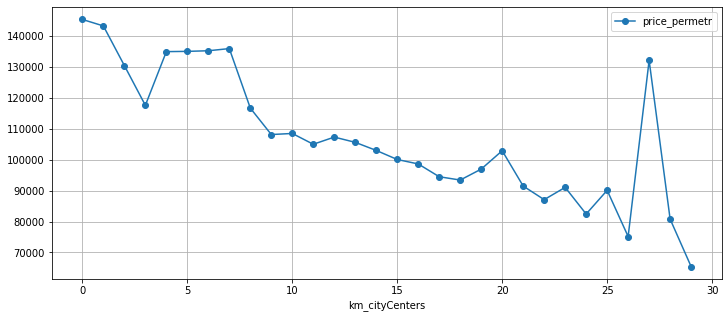

In [60]:
spb_data.pivot_table(index = 'km_cityCenters', values = 'price_permetr').plot(grid=True, style = 'o-', figsize=(12, 5))

In [61]:
# На 7 км видна центральная зона. Ценник изрядно скачет на 25км... Рублёвка в СПБ ?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BE27C5C88>]],
      dtype=object)

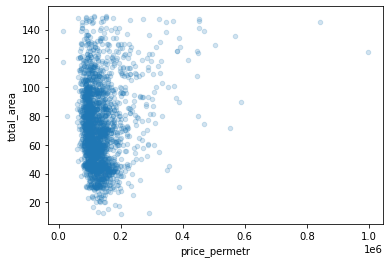

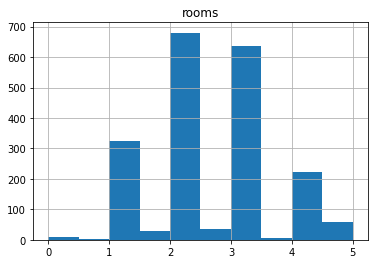

In [62]:
# проанализируем квартиры в центре
spb_centr = spb_data.query('km_cityCenters <= 7')
# проверим цену площади, цены, числа комнат, числа картинок высоты потолков, этажа 
# удалённости от центра, даты размещения объявления в зависимости от цены за кв.метр
spb_centr.plot(x='price_permetr', y='total_area', kind='scatter', alpha=0.2)
spb_centr.pivot_table(index='price_permetr', values='rooms').hist()


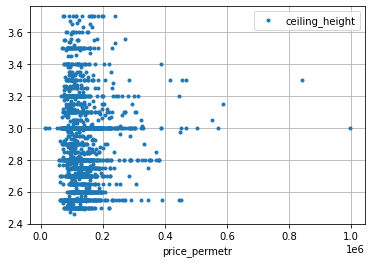

In [63]:
spb_centr.pivot_table(index='price_permetr', values='ceiling_height').plot(grid=True, style = '.')

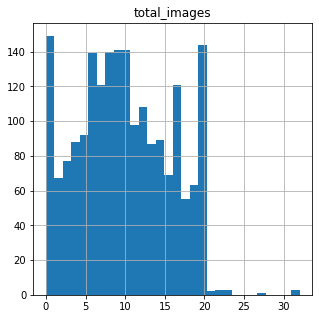

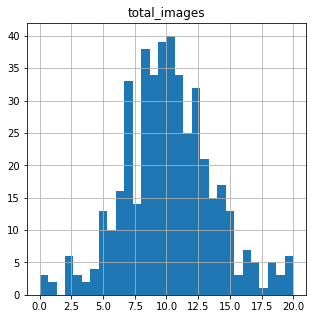

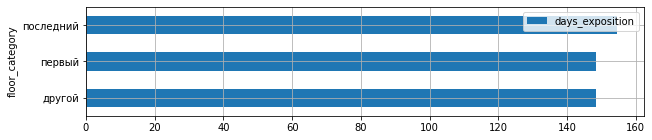

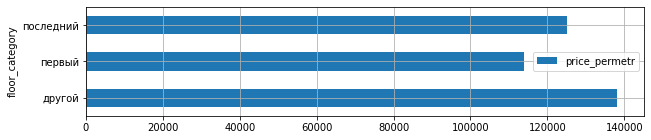

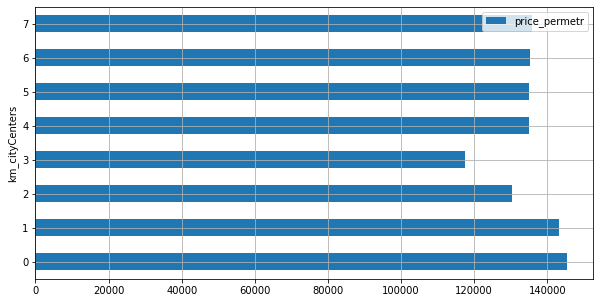

In [64]:
spb_centr.pivot_table(index='price_permetr', values='total_images').hist(bins = 30, figsize=(5, 5))
spb_centr.pivot_table(index='days_exposition', values='total_images').hist(bins = 30, figsize=(5, 5))
spb_centr.pivot_table(index='floor_category', values='days_exposition').plot(kind = 'barh', figsize = (10,2), grid = True)
spb_centr.pivot_table(index='floor_category', values='price_permetr').plot(kind = 'barh', figsize = (10,2), grid = True)
spb_centr.pivot_table(index = 'km_cityCenters', values = 'price_permetr').plot(kind = 'barh', figsize = (10,5), grid = True)
plt.show()

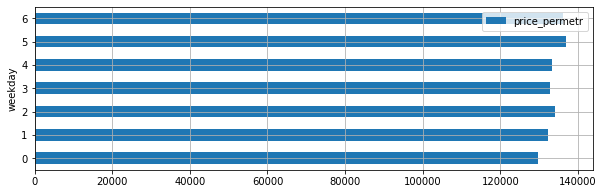

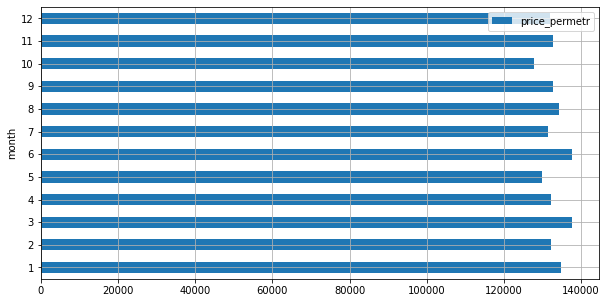

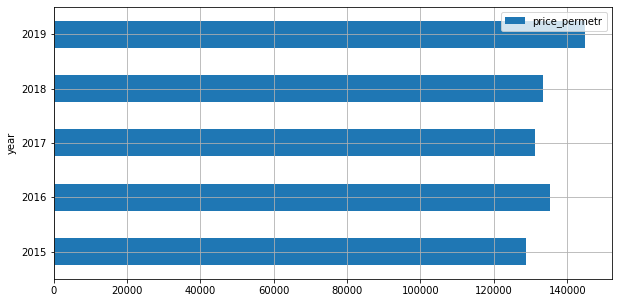

In [65]:
spb_centr.pivot_table(index = 'weekday', values = 'price_permetr').plot(kind = 'barh', figsize = (10,3), grid = True)
spb_centr.pivot_table(index = 'month', values = 'price_permetr').plot(kind = 'barh', figsize = (10,5), grid = True)
spb_centr.pivot_table(index = 'year', values = 'price_permetr').plot(kind = 'barh', figsize = (10,5), grid = True)

### Шаг 5. Общий вывод

Итак!)
В общем по Ленинградской области:
1. В данных поссчитаны не все расстояния до квартир. Нужно сообщить руководству
1. Была выявлена хорошая корреляция между общей площадью, жилой и кухни
2. Отсекли фантомные сроки продаж, которые портили статистику 
3. В среднем квартиру продают за 120 дней. А топовый продавец это Питер
4. Была потверждена ликвидность "однушек"
5. Квартиры на крайних этажах покупают реже
6. В основном берут хаты около 45 кв. сразу за ними 60 кв.м.
7. Срок продажи ростёт с площадью
8. Цены в основном до 10 млн. и площади до от 20 до 150 м2. Цены растут вместе с площадью и хорошо коррелируется! 
9. объявления живут больше всего в начале недели, летом квартиры хуже продаются.  А вот 2019 году мы срезали пласт с некачественными данными. Ведь с каждым годом срок размещения должен падать, т.к. население увеличивается из года в год.
10. Публикуют в основном в будни, по выходным отдыхают. Среди недели ломят самые высокие цены!
11. Сезон падает к лету и концу года. Наростает после лета. В августе цены самые высокие
12. Срезали 2019 год... Возможно там было слишком много спама от ботов. Цена за кв метр падала до 2018 по срезу
По Питеру:
1. На 7 км видна центральная зона спада цен. Ценник изрядно скачет на 25км... Рублёвка в СПБ ? 
2. Цена за кв. метр кучно группируется в пределах 100-170 к, при площади до 100 кв.м.
3. Двушки и трёшки в центре Питера дороже, чем казалось по общим данным. Интресно! 
4. Основная масса квартир сосредоточена на высоте потолков 3 метра.
5. Картинки! Чем их больше тем быстрее будет продажа. И желательно целевые. До 10 шт.
6. Разницы особой нет. Но продаются лучше квартиры не на крайних этажах. Они же и чуть дороже.
7. Цена за квартиру в центре не особо отличается. Если ты можешь позволить себе квартиру в центре, то можно купить и поближе к Дворцовой площади!
8. С каждым годом квартиры в центре культурной столице дороже. Что не бьётся с общей статистикой.
Ура! Чтож, в ещё Питере много коммуналок, было бы любопотно посмотреть на их статистику. 